In [1]:
import numpy as np  
import pandas as pd

In [2]:
trump_tweets_till_2020 = pd.read_csv('trump_tweets.csv')

trump_tweets_till_2020["date"] = pd.to_datetime(trump_tweets_till_2020["date"], format="%m/%d/%Y %H:%M")
trump_tweets_till_2020 = trump_tweets_till_2020[trump_tweets_till_2020["date"].dt.year >= 2014]

trump_tweets_till_2020 = trump_tweets_till_2020[~trump_tweets_till_2020["text"].str.startswith('"""')]

final_trump_tweets_till_2020 = trump_tweets_till_2020[['text','date']]


In [3]:
trump_truths_dataset = pd.read_csv('trump_truths_dataset.csv')
trump_truths_dataset = trump_truths_dataset[['status_text','post_date']]
trump_truths_dataset = trump_truths_dataset.dropna(subset='status_text')

In [4]:
trump_truths_dataset = trump_truths_dataset.dropna(subset='status_text')
trump_truths_dataset["post_date"] = pd.to_datetime(trump_truths_dataset["post_date"]).dt.strftime("%m/%d/%Y %H:%M")
trump_truths_dataset = trump_truths_dataset.rename(columns={'status_text': 'text', 'post_date': 'date'})

In [5]:
final_dataset = pd.concat([final_trump_tweets_till_2020, trump_truths_dataset], ignore_index=True)

In [6]:
final_dataset

,text,date
0,Today is the first day of the rest of your lif...,2014-01-01 12:56:00
1,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:00
2,"The only Forbes 5 Star &amp, 5 Diamond hotel w...",2014-01-02 18:09:00
3,Entrepreneurs are visionaries in some respects...,2014-01-02 18:27:00
4,It's Jan. 2. President Obama should end his va...,2014-01-02 20:48:00
...,...,...
39496,https://www.thegatewaypundit.com/2024/02/break...,05/23/2024 02:10
39497,Congresswoman Julia Letlow is doing a fantasti...,05/23/2024 02:10
39498,"Evan Gershkovich, the Reporter from The Wall S...",05/23/2024 01:30
39499,"As usual, the Democrats have pushed Misinforma...",05/23/2024 00:36


In [7]:
final_dataset.to_csv('final_dataset.csv')

In [8]:
final_dataset

,text,date
0,Today is the first day of the rest of your lif...,2014-01-01 12:56:00
1,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:00
2,"The only Forbes 5 Star &amp, 5 Diamond hotel w...",2014-01-02 18:09:00
3,Entrepreneurs are visionaries in some respects...,2014-01-02 18:27:00
4,It's Jan. 2. President Obama should end his va...,2014-01-02 20:48:00
...,...,...
39496,https://www.thegatewaypundit.com/2024/02/break...,05/23/2024 02:10
39497,Congresswoman Julia Letlow is doing a fantasti...,05/23/2024 02:10
39498,"Evan Gershkovich, the Reporter from The Wall S...",05/23/2024 01:30
39499,"As usual, the Democrats have pushed Misinforma...",05/23/2024 00:36


In [9]:
import geonamescache

In [10]:
gc = geonamescache.GeonamesCache()
countries = set([v["name"] for v in gc.get_countries().values()])
countries

{'Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba ',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos Islands',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',

In [11]:
def mark_foreign_policy(text):
    if any(country in text for country in countries):
        return "Foreign Policy"
    return "Not Foreign Policy"

final_dataset["foreign_policy"] = final_dataset["text"].apply(mark_foreign_policy)


In [12]:
foreign_policy_df = final_dataset[final_dataset['foreign_policy'] == "Foreign Policy"]

In [13]:
foreign_policy_df

,text,date,foreign_policy
10,"""Via @BloombergNews by Peter Millard: """"Trump ...",2014-01-03 19:49:00,Foreign Policy
19,Another one of my predictions just came true--...,2014-01-06 16:37:00,Foreign Policy
20,Sec of State Kerry said we would not go back t...,2014-01-06 16:38:00,Foreign Policy
31,Why didn’t Gates resign if he was so unhappy a...,2014-01-08 22:12:00,Foreign Policy
35,"The news about our beautiful Miss Venezuela, M...",2014-01-09 17:53:00,Foreign Policy
...,...,...,...
39415,We believe that Marxism is an evil doctrine st...,05/26/2024 00:18,Foreign Policy
39418,“President Trump’s appearance at the conventio...,05/25/2024 22:31,Foreign Policy
39455,God bless Davy and Natalie. Such a tragedy. Ha...,05/24/2024 10:40,Foreign Policy
39485,Hispanics are outraged that Marxist tactics li...,05/22/2024 23:41,Foreign Policy


In [14]:
import re
import spacy
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()

# Expanded keyword dictionary
categories = {
    "War": [
        "war", "troops", "military", "conflict", "NATO", "invasion", "attack", 
        "airstrike", "bombing", "insurgents", "battle", "offensive", "combat"
    ],
    "Tariffs": [
        "tariff", "trade war", "import tax", "duties", "levies", "trade deficit", 
        "export restrictions", "economic retaliation"
    ],
    "Deals": [
        "deal", "agreement", "pact", "treaty", "negotiation", "contract", "trade agreement", 
        "peace agreement", "free trade"
    ],
    "Sanctions": [
        "sanction", "embargo", "ban", "restrictions", "blacklist", "frozen assets", 
        "economic penalties", "blockade", "export controls"
    ],
    "Diplomacy": [
        "diplomacy", "meeting", "summit", "talks", "relations", "peace talks", 
        "bilateral", "multilateral", "diplomatic mission"
    ],
    "Nuclear Policy": [
        "nuclear", "disarmament", "proliferation", "treaty", "uranium enrichment", 
        "missile test", "ICBM", "nuclear arsenal"
    ],
    "Security": [
        "security", "defense", "military cooperation", "intelligence", "counterterrorism", 
        "homeland security", "national security", "espionage", "cybersecurity"
    ],
    "Human Rights": [
        "human rights", "asylum", "refugee", "war crime", "genocide", "ethnic cleansing", 
        "political prisoner", "oppression", "freedom of speech"
    ],
    "Energy Policy": [
        "oil", "gas", "energy security", "pipeline", "OPEC", "fracking", "energy sanctions", 
        "fossil fuels", "renewable energy"
    ]
}

# Function to categorize tweets
def categorize_foreign_policy(text):
    text_lower = text.lower()
    text_tokens = word_tokenize(text_lower)
    text_stems = [stemmer.stem(word) for word in text_tokens]

    for category, keywords in categories.items():
        for keyword in keywords:
            # Use stemming to match word variations
            keyword_stem = stemmer.stem(keyword)
            
            # Regex to ensure exact word match (e.g., "war" vs. "warlike")
            pattern = r"\b" + re.escape(keyword) + r"\b"
            
            if re.search(pattern, text_lower) or keyword_stem in text_stems:
                return category

    # Use Named Entity Recognition (NER) for additional context
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ["GPE", "ORG", "EVENT"]:  # Geopolitical Entity, Organization, or Event
            return "Geopolitics"

    return "Uncategorized"

# Apply categorization
foreign_policy_df["foreign_policy_category"] = foreign_policy_df["text"].apply(categorize_foreign_policy)


/tmp/ipykernel_3742/441713497.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_policy_df["foreign_policy_category"] = foreign_policy_df["text"].apply(categorize_foreign_policy)


In [15]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# vectorizer = CountVectorizer(stop_words='english')
# X = vectorizer.fit_transform(foreign_policy_df["text"])

# lda = LatentDirichletAllocation(n_components=10, random_state=42) 
# lda.fit(X)

# foreign_policy_df["topic"] = lda.transform(X).argmax(axis=1)

# words = np.array(vectorizer.get_feature_names_out())

# num_top_words = 20  
# for topic_idx, topic in enumerate(lda.components_):
#     top_words = words[np.argsort(topic)[-num_top_words:]]  
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")


In [16]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(foreign_policy_df["text"])

# num_clusters = 10
# kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
# foreign_policy_df["cluster"] = kmeans.fit_predict(X)

# feature_names = vectorizer.get_feature_names_out()
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# for i in range(num_clusters):
#     print(f"\nCluster {i} top words:")
#     top_words = [feature_names[ind] for ind in order_centroids[i, :20]]  
#     print(", ".join(top_words))

In [17]:
foreign_policy_df

,text,date,foreign_policy,foreign_policy_category
10,"""Via @BloombergNews by Peter Millard: """"Trump ...",2014-01-03 19:49:00,Foreign Policy,Geopolitics
19,Another one of my predictions just came true--...,2014-01-06 16:37:00,Foreign Policy,Geopolitics
20,Sec of State Kerry said we would not go back t...,2014-01-06 16:38:00,Foreign Policy,Geopolitics
31,Why didn’t Gates resign if he was so unhappy a...,2014-01-08 22:12:00,Foreign Policy,Geopolitics
35,"The news about our beautiful Miss Venezuela, M...",2014-01-09 17:53:00,Foreign Policy,Uncategorized
...,...,...,...,...
39415,We believe that Marxism is an evil doctrine st...,05/26/2024 00:18,Foreign Policy,War
39418,“President Trump’s appearance at the conventio...,05/25/2024 22:31,Foreign Policy,Geopolitics
39455,God bless Davy and Natalie. Such a tragedy. Ha...,05/24/2024 10:40,Foreign Policy,Geopolitics
39485,Hispanics are outraged that Marxist tactics li...,05/22/2024 23:41,Foreign Policy,Geopolitics


In [18]:
categorised_foreign_policy_df = foreign_policy_df[foreign_policy_df['foreign_policy_category'] != 'Uncategorized']

In [19]:
#foreign_policy_df.to_csv('foreign_policy_df.csv')

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

In [21]:
forex_pairs = [
    "USDEUR=X", "USDGBP=X", "USDJPY=X", "USDMXN=X", "USDCAD=X",
    "USDAUD=X", "USDCHF=X", "USDBRL=X", "USDZAR=X", "USDTHB=X",
    "USDIDR=X", "USDSGD=X", "USDHKD=X",  "USDINR=X", "USDKRW=X"
]


In [22]:
forex_data = yf.download(forex_pairs, start="2015-01-01", end="2020-12-30", interval="1d")["Close"]

[*********************100%***********************]  15 of 15 completed


In [23]:
daily_returns = np.log(forex_data / forex_data.shift(1))
daily_returns

Ticker,USDAUD=X,USDBRL=X,USDCAD=X,USDCHF=X,USDEUR=X,USDGBP=X,USDHKD=X,USDIDR=X,USDINR=X,USDJPY=X,USDKRW=X,USDMXN=X,USDSGD=X,USDTHB=X,USDZAR=X
Date,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.000817,-0.000377,-0.000052,-0.000010,0.000762,0.000078,0.000317,0.000000,0.000000,0.001645,0.000823,0.004574,-0.000091,0.000578,0.008990
2015-01-05,0.013565,0.014221,0.015295,0.011701,0.011897,0.019104,0.000032,0.007238,0.003959,0.004694,0.015786,0.007997,0.007878,0.007091,0.014974
2015-01-06,-0.003961,0.004412,-0.003057,0.000398,0.000621,0.001741,-0.000062,0.011552,0.000948,-0.008413,-0.002253,-0.003000,0.000038,-0.005542,-0.002767
2015-01-07,0.002427,-0.002408,0.006781,0.005056,0.005346,0.007918,-0.000195,0.000792,0.003625,-0.006317,-0.010155,-0.012462,-0.000210,-0.002645,0.002110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.003107,0.007341,0.003115,0.002684,0.004115,0.003732,-0.000004,0.015724,0.004517,0.001876,0.005539,0.006057,0.001747,0.006041,0.005333
2020-12-24,-0.003687,0.011309,-0.003714,0.000045,-0.000390,-0.007869,-0.000031,-0.012455,-0.005809,0.000174,-0.002874,-0.002735,-0.002250,-0.001026,-0.005832
2020-12-25,-0.003583,0.000000,0.000210,0.003373,0.000548,-0.003453,0.000121,0.000123,-0.003826,0.000975,-0.004436,-0.009064,-0.003407,-0.005647,-0.003949


In [24]:
categorised_foreign_policy_df["date"] = pd.to_datetime(categorised_foreign_policy_df["date"], errors="coerce")

daily_returns.index = pd.to_datetime(daily_returns.index, errors="coerce")

/tmp/ipykernel_3742/3902572841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorised_foreign_policy_df["date"] = pd.to_datetime(categorised_foreign_policy_df["date"], errors="coerce")


In [25]:
# Initialize an empty list to store results
results = []

# Iterate over each row in text dataframe
for _, row in categorised_foreign_policy_df.iterrows():
    text_date = row["date"]
    category = row["foreign_policy_category"]
    text = row["text"]  # Keep the text

    # Find the next available forex date
    next_day = daily_returns.index[daily_returns.index > text_date].min()

    if pd.notna(next_day):  # Ensure next_day is valid
        forex_returns = daily_returns.loc[next_day].copy()
        forex_returns["date"] = next_day
        forex_returns["foreign_policy_category"] = category
        forex_returns["text"] = text  # Add text column
        results.append(forex_returns)

# Convert results to DataFrame
results_df = pd.DataFrame(results)


In [26]:
results_df

Ticker,USDAUD=X,USDBRL=X,USDCAD=X,USDCHF=X,USDEUR=X,USDGBP=X,USDHKD=X,USDIDR=X,USDINR=X,USDJPY=X,USDKRW=X,USDMXN=X,USDSGD=X,USDTHB=X,USDZAR=X,date,foreign_policy_category,text
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-01,Geopolitics,"""Via @BloombergNews by Peter Millard: """"Trump ..."
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-01,Geopolitics,Another one of my predictions just came true--...
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-01,Geopolitics,Sec of State Kerry said we would not go back t...
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-01,Geopolitics,Why didn’t Gates resign if he was so unhappy a...
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-01,Deals,The Senate should immediately vote on the Iran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,RT @gregkellyusa: A COUP was waged against @re...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,The lockdowns in Democrat run states are absol...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Deals,"....Courts are bad, the FBI and “Justice” didn..."
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,$2000 + $2000 plus other family members. Not $...


In [27]:
results_df = results_df.dropna()
results_df

Ticker,USDAUD=X,USDBRL=X,USDCAD=X,USDCHF=X,USDEUR=X,USDGBP=X,USDHKD=X,USDIDR=X,USDINR=X,USDJPY=X,USDKRW=X,USDMXN=X,USDSGD=X,USDTHB=X,USDZAR=X,date,foreign_policy_category,text
2015-01-08,0.000565,-0.005876,-0.001564,0.003396,0.00332,0.002011,0.000074,0.006705,-0.004652,0.005177,0.000456,-0.003302,0.002426,-0.000487,-0.002777,2015-01-08,Geopolitics,Congratulations to new Congressman @leezeldin ...
2015-01-09,-0.004776,-0.007902,0.000753,0.003492,0.003379,0.001298,0.000044,-0.008685,-0.009608,0.004208,-0.003193,-0.004636,0.000344,0.0,-0.009607,2015-01-09,War,"""Via @Newsmax_Media by @melaniebatley: """"Donal..."
2015-01-12,-0.013232,-0.012599,0.001428,-0.006374,-0.006307,-0.006706,-0.000208,-0.003575,-0.005119,-0.013277,-0.011489,0.003702,-0.004878,-0.00302,-0.008785,2015-01-12,Geopolitics,The French police are afraid to go into many ...
2015-01-27,-0.005845,0.000814,0.001789,0.022667,-0.010929,-0.005956,-0.000017,0.005139,0.000651,0.009827,-0.004806,0.002986,-0.002231,-0.006803,0.00165,2015-01-27,Geopolitics,A huge honor for @TrumpToronto for being named...
2015-01-29,0.003637,0.001478,0.010275,0.008637,0.007587,0.003018,-0.000008,0.000402,-0.000847,-0.001555,0.007126,0.003859,0.010658,0.000954,-0.000199,2015-01-29,Geopolitics,#IndianaJones and #Ghostbusters- what's wrong?...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,RT @gregkellyusa: A COUP was waged against @re...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,The lockdowns in Democrat run states are absol...
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Deals,"....Courts are bad, the FBI and “Justice” didn..."
2020-12-28,-0.000672,0.0,-0.00067,-0.001651,-0.001671,-0.001503,0.000022,-0.016929,0.001782,-0.001158,-0.000746,0.000085,0.000934,0.001498,0.005126,2020-12-28,Geopolitics,$2000 + $2000 plus other family members. Not $...


In [28]:
grouped_results = results_df.drop(columns=["text", "date"]).groupby("foreign_policy_category").mean()
grouped_results

Ticker,USDAUD=X,USDBRL=X,USDCAD=X,USDCHF=X,USDEUR=X,USDGBP=X,USDHKD=X,USDIDR=X,USDINR=X,USDJPY=X,USDKRW=X,USDMXN=X,USDSGD=X,USDTHB=X,USDZAR=X
foreign_policy_category,,,,,,,,,,,,,,,
Deals,-0.000233,-0.000802,-0.00018,-0.000306,-0.000031,-0.000131,-0.00001,-0.000053,-0.0002,-0.000466,-0.000371,-0.001301,-0.000203,-0.000062,-0.000697
Diplomacy,-0.000104,-0.000412,-0.000196,-0.000305,-0.000078,-0.000247,-0.000027,-0.000532,-0.000317,-0.000434,-0.000337,-0.000589,-0.000101,-0.000339,0.000107
Energy Policy,0.000199,0.002264,-0.000923,-0.000007,0.000347,0.000022,0.000004,0.001284,0.000542,0.000398,0.000387,0.000222,0.000238,-0.000978,0.002019
Geopolitics,0.000049,-0.00014,-0.000053,-0.000367,-0.00024,0.000016,0.0,-0.000931,-0.000412,-0.000299,-0.000159,-0.000052,-0.000053,-0.000406,-0.000055
Human Rights,0.00099,-0.003964,0.001684,0.000522,0.000416,0.001062,0.000091,-0.000698,-0.001651,-0.000047,-0.000417,0.006212,0.000384,-0.005044,-0.000506
Nuclear Policy,-0.000183,-0.001885,0.000555,0.001739,0.00194,0.001738,-0.000129,-0.002354,-0.000181,0.001423,-0.000316,0.000787,0.00088,-0.000523,0.001516
Sanctions,0.0012,-0.001919,-0.000037,-0.000193,-0.000637,0.000218,0.00003,-0.003205,-0.00254,0.000785,-0.000222,-0.000189,0.000088,-0.000326,0.001096
Security,0.000031,0.001894,-0.000269,-0.00069,-0.000702,0.00009,-0.0,-0.000091,-0.000648,-0.000034,-0.000292,0.000481,-0.000183,-0.000784,-0.000039
Tariffs,-0.000258,-0.001857,-0.000649,-0.001277,-0.000475,0.000153,-0.000061,-0.00071,-0.000454,-0.000948,0.000336,-0.00127,-0.000066,-0.001139,-0.001243


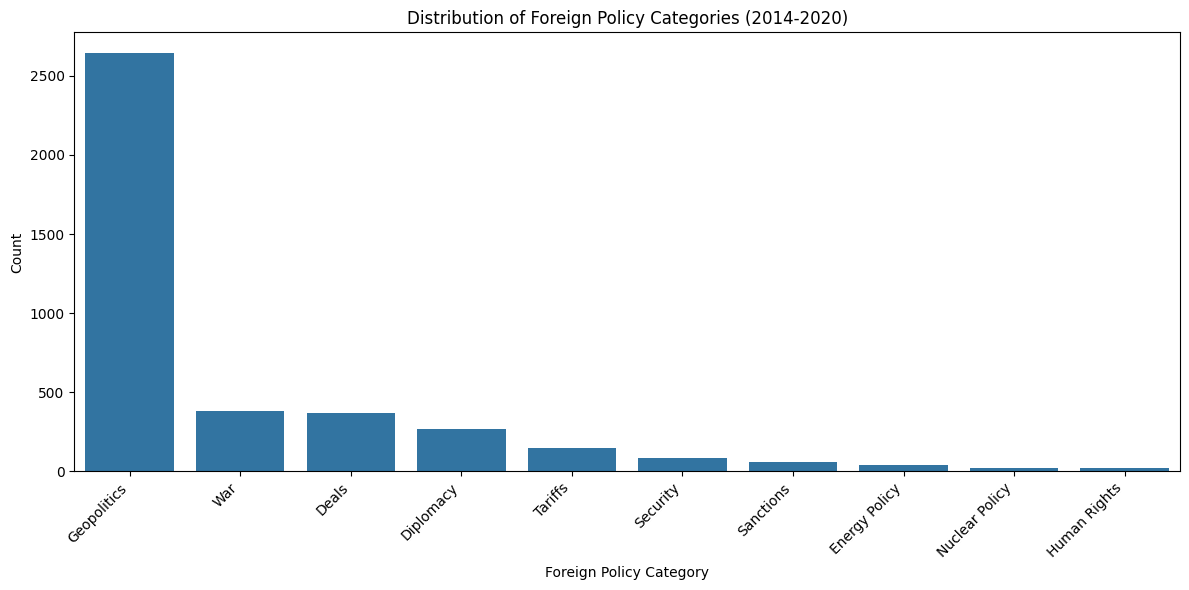

In [29]:
import seaborn as sns

# Filter the dataframe for the specified date range
filtered_df = categorised_foreign_policy_df[
    (categorised_foreign_policy_df['date'] >= '2014-01-01') & 
    (categorised_foreign_policy_df['date'] <= '2020-12-31')
]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='foreign_policy_category', order=filtered_df['foreign_policy_category'].value_counts().index)
plt.title('Distribution of Foreign Policy Categories (2014-2020)')
plt.xlabel('Foreign Policy Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

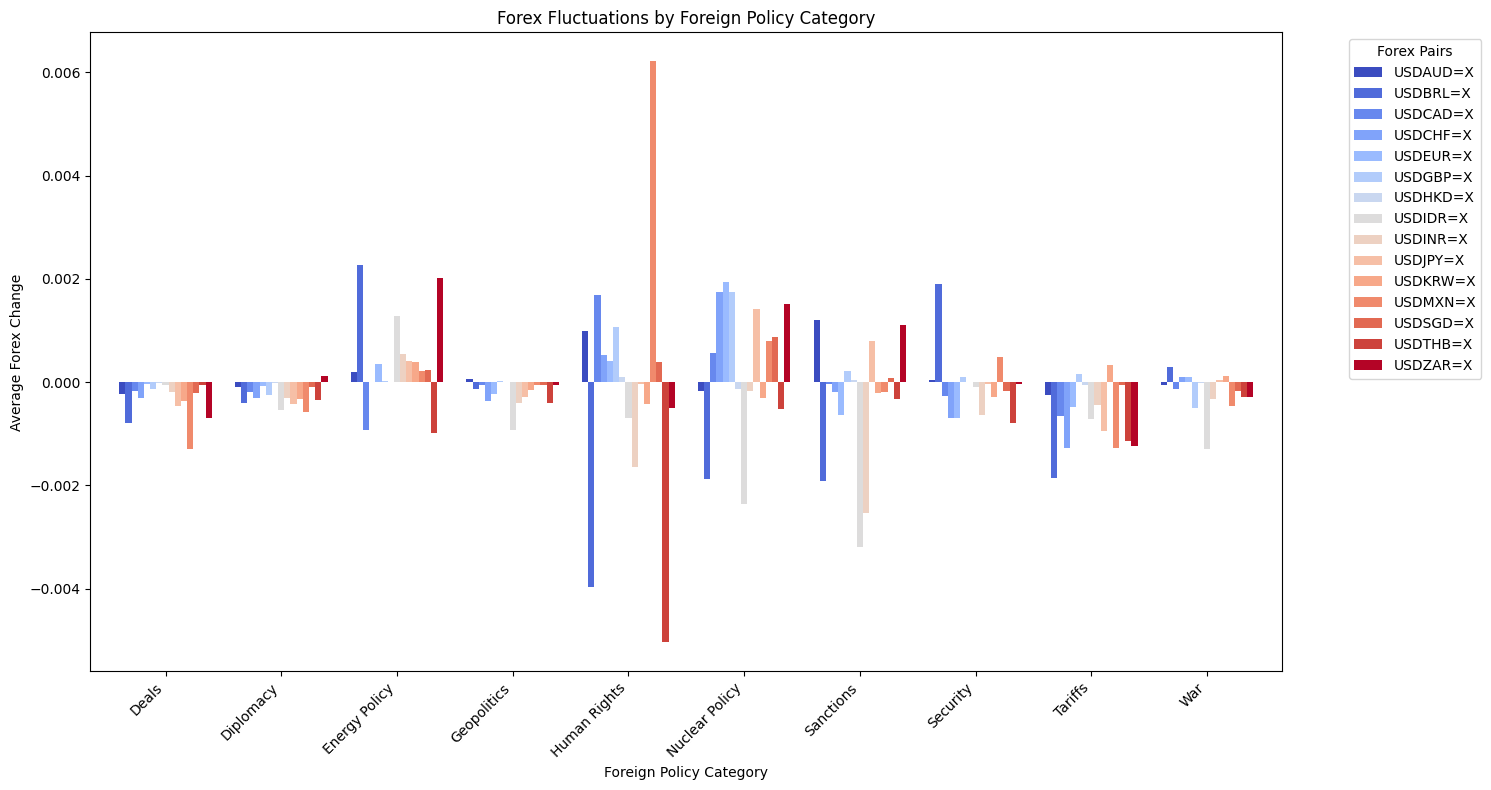

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
grouped_results.plot(kind='bar', figsize=(15, 8), colormap='coolwarm', width=0.8)
plt.title('Forex Fluctuations by Foreign Policy Category')
plt.xlabel('Foreign Policy Category')
plt.ylabel('Average Forex Change')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Forex Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


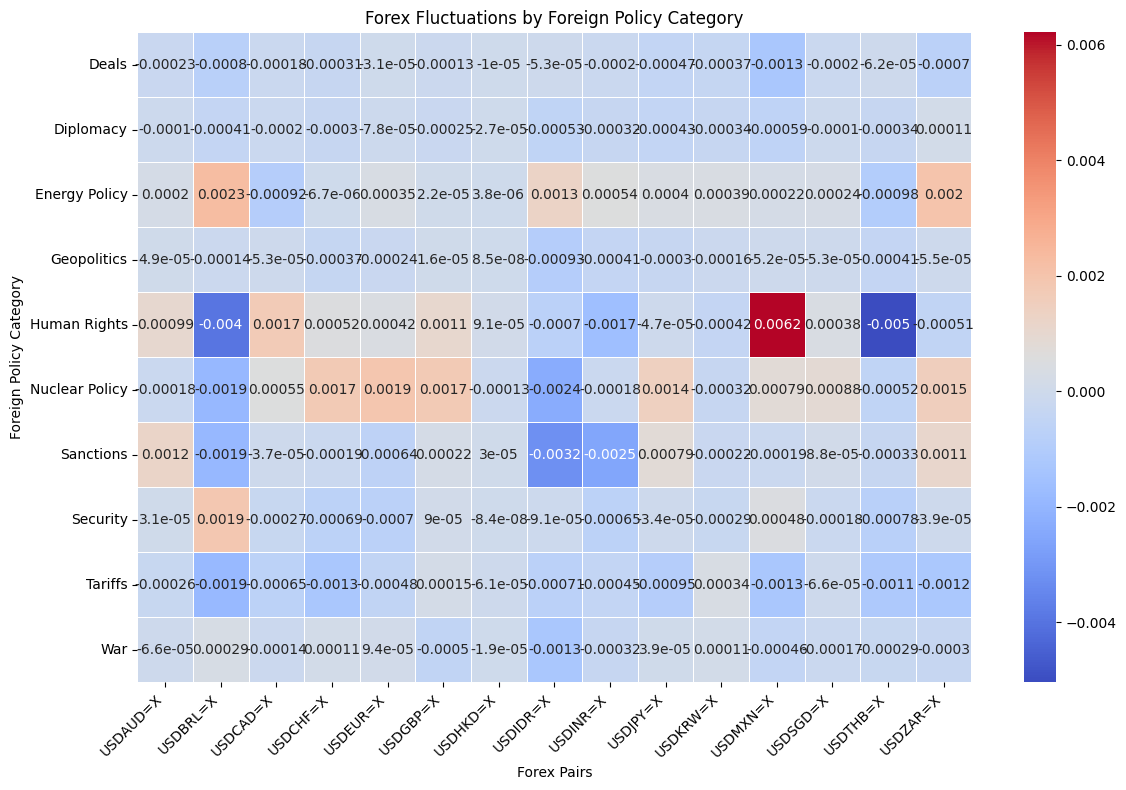

In [31]:
import seaborn as sns

plt.figure(figsize=(12, 8))
grouped_results = grouped_results.astype(float)
sns.heatmap(grouped_results, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Forex Fluctuations by Foreign Policy Category')
plt.xlabel('Forex Pairs')
plt.ylabel('Foreign Policy Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


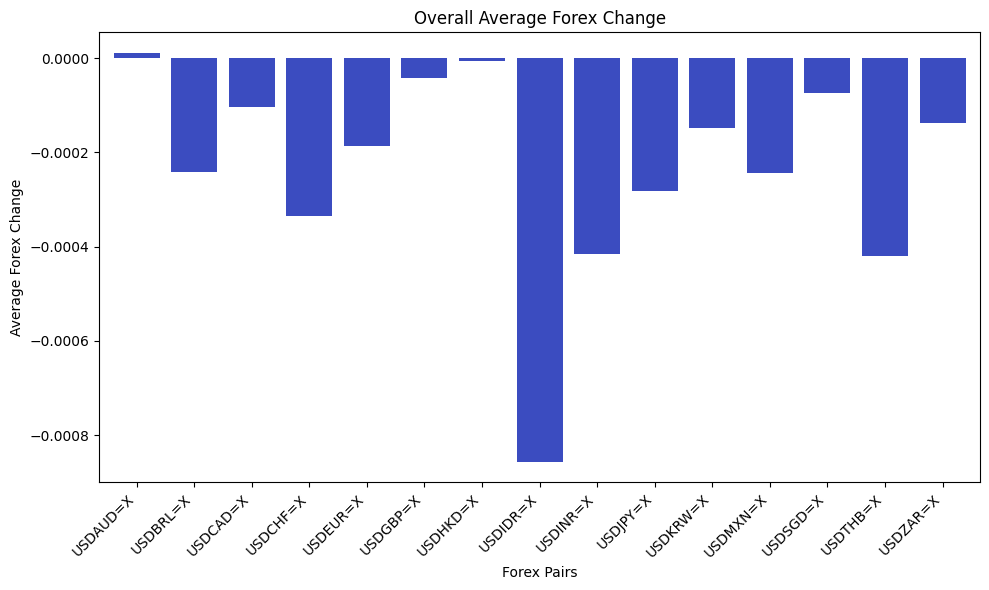

In [32]:
# Calculate the overall mean of forex returns
overall_mean = results_df.drop(columns=["text", "date", "foreign_policy_category"]).mean()

# Plot the overall mean forex returns
plt.figure(figsize=(10, 6))
overall_mean.plot(kind='bar', colormap='coolwarm', width=0.8)
plt.title('Overall Average Forex Change')
plt.xlabel('Forex Pairs')
plt.ylabel('Average Forex Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
